In [1]:
import pandas as pd

,MJ_m2
count,61.000000
mean,0.394098
std,0.128859
min,0.070000
25%,0.340000
50%,0.410000
75%,0.460000
max,0.670000


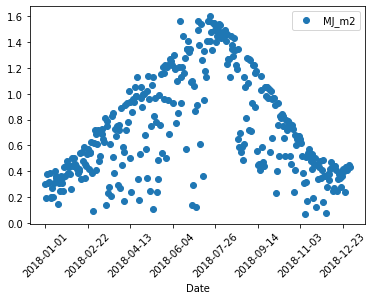

In [12]:
colunms = ['Code', 'Date', 'MJ_m2','W/m2']
df_uv_2018 = pd.read_csv('UV2018.csv', encoding= 'unicode_escape', header = None, skiprows = 1, names = colunms)
df_uv_2018 = df_uv_2018[['Date', 'MJ_m2']]
df_uv_2018 = df_uv_2018[df_uv_2018.MJ_m2 >= 0.0]
df_uv_2018.set_index('Date', inplace = True)
df_uv_2018.plot(rot = 45, style = 'o')

df_uv_2018.reset_index(inplace = True)
df_uv_2018['Date'] = pd.to_datetime(df_uv_2018['Date'])
df_uv_2018_winter = df_uv_2018[df_uv_2018.Date.dt.month >= 11]
df_uv_2018_winter.describe()

In [ ]:
colunms = ['Code', 'Date', 'MJ_m2', 'W/m2']
df_uv_2019 = pd.read_csv('UV2019.csv', encoding='unicode_escape', header=None, skiprows=1, names=colunms)
df_uv_2019 = df_uv_2019[['Date', 'MJ_m2']]
df_uv_2019 = df_uv_2019[df_uv_2019.MJ_m2 >= 0.0]
df_uv_2019.set_index('Date', inplace=True)
df_uv_2019.plot(rot=45, style='o')
df_uv_2019.describe()

<AxesSubplot:title={'center':'UV energy[MJ/m2] with respect to time'}, xlabel='Date'>

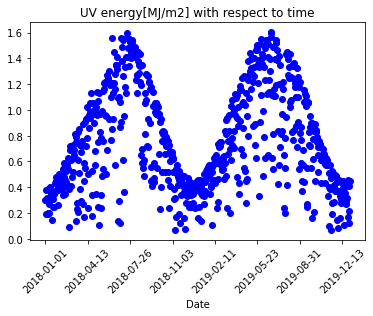

In [4]:
from collections import deque
uv = deque()
uv.append(df_uv_2018)
uv.append(df_uv_2019)
df_uv = pd.concat(uv, ignore_index = False)
df_uv.plot(title = 'UV energy[MJ/m2] with respect to time',rot = 45, legend = False, style = 'bo')

In [6]:
import numpy as np
y_2018 = np.reshape(list(df_uv_2018.MJ_m2.values),len(df_uv_2018))
y_2019 = np.reshape(list(df_uv_2019.MJ_m2.values),len(df_uv_2019))
y = np.reshape(list(df_uv.MJ_m2.values),len(df_uv))
np.shape(y)

(719,)

In [7]:
df_uv.reset_index(inplace = True)
date = df_uv.Date.values
date

array(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
       '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
       '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
       '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
       '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
       '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
       '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
       '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
       '2018-02-08', '2018-02-09', '2018-02-10', '2018-02-11',
       '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15',
       '2018-02-16', '2018-02-17', '2018-02-18', '2018-02-19',
       '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23',
       '2018-02-24', '2018-02-25', '2018-02-26', '2018-02-27',
       '2018-02-28', '2018-03-01', '2018-03-02', '2018-03-03',
       '2018-03-04', '2018-03-05', '2018-03-06', '2018-

/var/folders/l9/glqlxsms6kg26pc8n2s189hw0000gn/T/ipykernel_2535/3371551483.py:8: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-1*b*(x-c)**2)


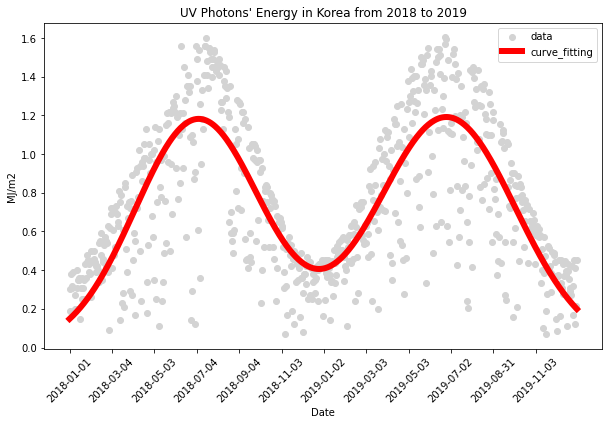

In [8]:
from scipy.optimize import curve_fit
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
x = np.linspace(0, len(y), len(y))/1000
y = y.copy()
def gauss(x, a,b,c):
    return a*np.exp(-1*b*(x-c)**2)
def func(x, c1, mu1, sigma1, c2, mu2, sigma2):
    return gauss(x, c1, mu1, sigma1) + gauss(x, c2, mu2, sigma2)

expected = [2,5,1, 2,5,1]
popt, conv = curve_fit(func, x, y, p0 = expected)
y_fit = [func(x, *popt) for x in x]

error = mean_squared_error(y, y_fit)
plt.figure(figsize = (10,6))
plt.scatter(x,y, marker = 'o', color = 'lightgrey', label = 'data')
plt.plot(x, y_fit, 'r-', label = 'curve_fitting', linewidth = 6)
plt.title("UV Photons' Energy in Korea from 2018 to 2019")
plt.xticks(x[::60], date[::60], rotation = 45)
plt.legend()
plt.xlabel('Date')
plt.ylabel('MJ/m2')
plt.savefig('UV_Chart5')